In [1]:
from Model3 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

initial_model_state = copy.deepcopy(model) 
for j in range(300):
    model.step()

There are 0 agents unassigned!!
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!


In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,Average_Livelihood,Num_household_members,Migrated_households,Migrated_members,Migrated_individuals,Died agents,Child births
0,0.161418,752,68,255,3,0,9
1,0.167306,744,71,261,4,9,17
2,0.161020,734,75,273,5,14,25
3,0.129758,715,78,288,9,23,34
4,0.132187,698,81,296,14,35,42
5,0.126239,687,84,308,15,36,45
6,0.125998,681,87,319,16,39,54
7,0.130044,680,89,324,19,39,61
8,0.129924,679,91,329,19,42,68
9,0.129683,673,94,342,19,43,76


In [4]:
agent_data = model.datacollector.get_agent_vars_dataframe()

agent_savings = agent_data[agent_data['Savings'].notna()]
agent_savings


Crop_type Land_category       Savings  too low income
Step AgentID                                                          
12   1004     Annual crops        medium  1.050000e+06             NaN
     1005     Annual crops        medium  1.050000e+06             NaN
     1006     Annual crops         small  1.050000e+06             NaN
     1007             Rice         small  1.566791e+04             NaN
     1008     Annual crops         small  1.050000e+06             NaN
...                    ...           ...           ...             ...
300  1272             None          None  1.974776e+09             0.0
     1274             None          None  5.440278e+09             0.0
     1275             None          None  1.959153e+09             0.0
     1276             None          None  4.748886e+09             0.0
     1277             None          None  2.813919e+09             0.0

[4408 rows x 4 columns]

In [5]:
agent_landless = agent_data[agent_data['too low income'].notna()]

agent_landless = agent_landless[agent_landless['too low income']==1]
agent_landless = agent_landless.reset_index()
agent_landless['Year'] = agent_landless['Step']//12

agent_landless = agent_landless.groupby('Year').size().reset_index(name="Too low income count")
agent_landless

,Year,Too low income count
0,1,8
1,2,13
2,3,13
3,4,15
4,5,17
5,6,16
6,7,16
7,8,18
8,9,15
9,10,14


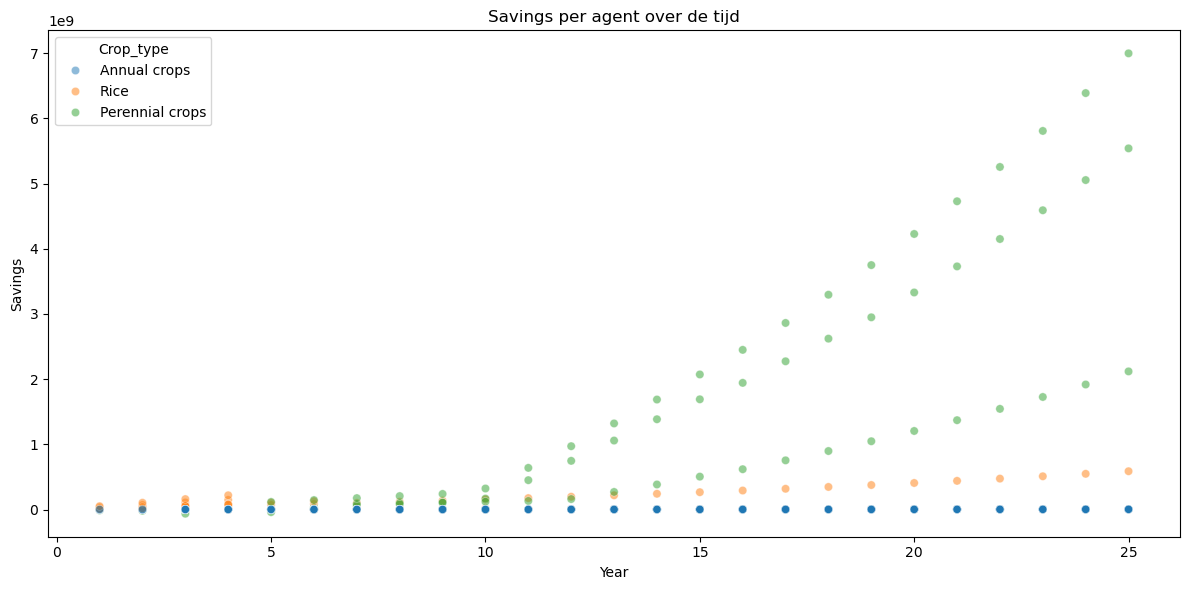

In [6]:
# agent_savings = agent_savings[agent_savings['Crop_type'].notna()]


agent_savings = agent_savings.reset_index() 
agent_savings['Year'] = agent_savings['Step'] / 12

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=agent_savings, x='Year', y='Savings', hue='Crop_type', alpha=0.5)
plt.title("Savings per agent over de tijd")
plt.ylabel("Savings")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

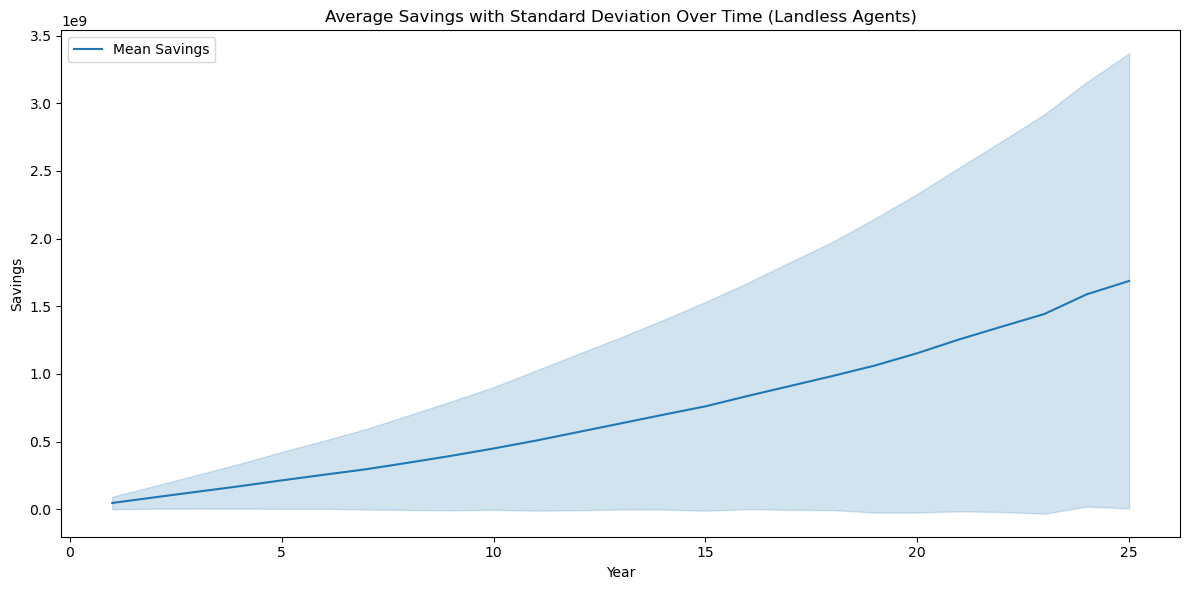

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter landless agents
landless_savings = agent_data[agent_data['too low income'].notna()].reset_index()
landless_savings['Year'] = landless_savings['Step'] / 12


# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=landless_savings,
    x="Year",
    y="Savings",
    errorbar='sd',  
    estimator="mean",
    label="Mean Savings",
    ci="sd"  
)

plt.title("Average Savings with Standard Deviation Over Time (Landless Agents)")
plt.xlabel("Year")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()



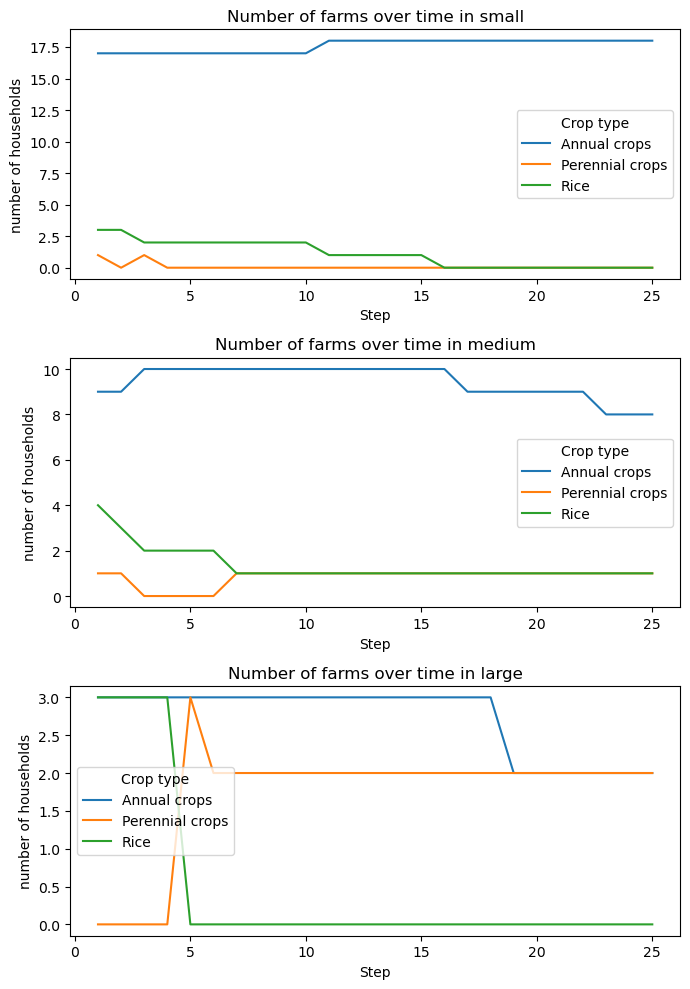

In [8]:
agent_data_crops_per_land = agent_data[agent_data['Crop_type'].notna()]
agent_data_crops_per_land

fig, axes = plt.subplots(nrows = 3, ncols= 1, figsize = (7,10))

for i, category in enumerate(['small', 'medium', 'large']):
    subsets = agent_data_crops_per_land[agent_data_crops_per_land["Land_category"]==category]
    if len(subsets) > 0:
        subsets = subsets.reset_index()
        subsets = subsets.groupby(['Step', "Crop_type"]).size().reset_index(name = "count")
        subsets = subsets.pivot(index = "Step", columns = "Crop_type", values = "count").fillna(0)
        subsets.index = subsets.index / 12
        subsets.plot(ax=axes[i])
        axes[i].set_title(f"Number of farms over time in {category}")
        axes[i].set_ylabel("number of households")
        axes[i].legend(title = "Crop type")
    
plt.xlabel("Step")
plt.tight_layout()
plt.show()

# agent_data_crops_per_land = agent_data_crops_per_land.reset_index().groupby(['Step', "Crop_type", "Land_category"]).size().reset_index(name = "count")
# agent_data_crops_per_land.plot(kind="line", figsize = (10,6))
#
# plt.title("Crop type distribution over time")
# 

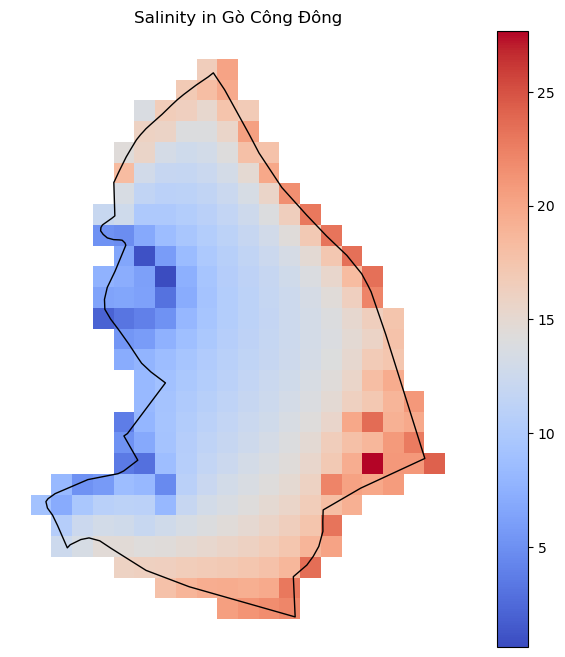

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

105
32


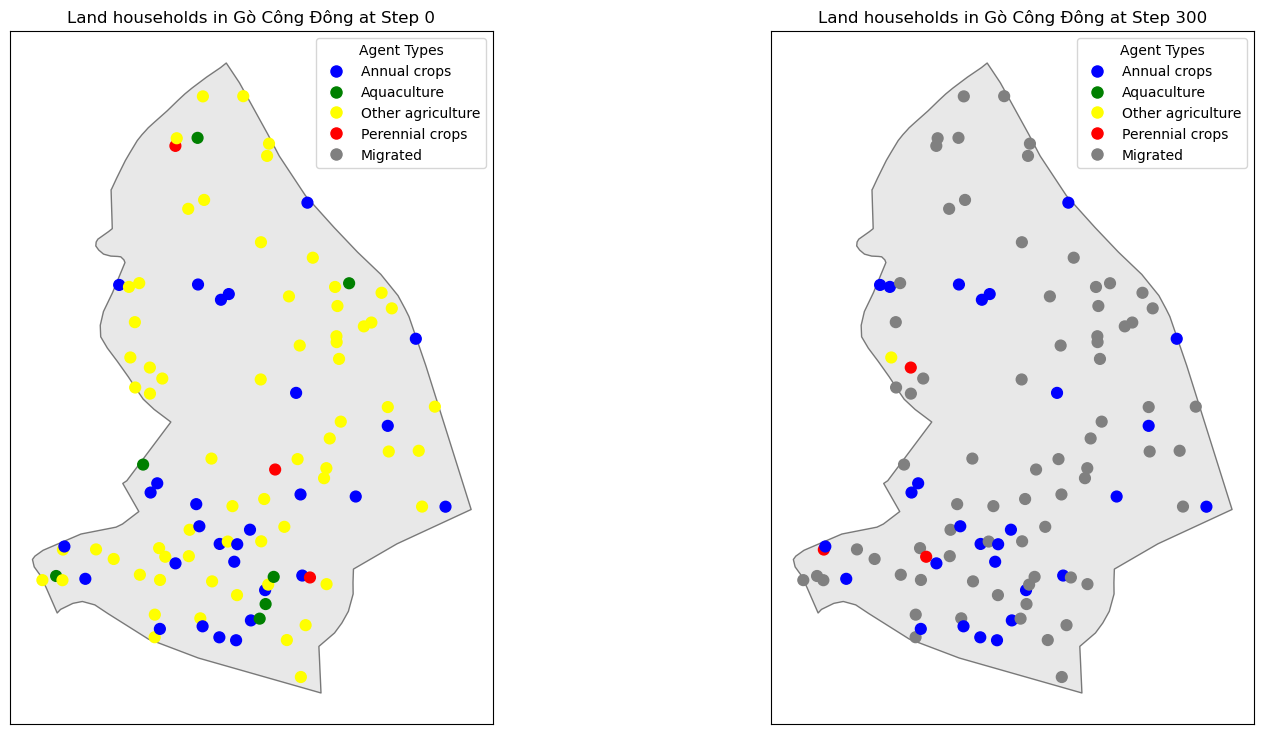

In [10]:
from Model3 import Large_land_households, Middle_land_households, Small_land_households

def plot_network(ax, model):
    ax.clear()

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')
    

    # Map node_id to agent
    node_to_agent = {agent.node_id: agent for agent in model.agents if isinstance(agent, (Large_land_households, Middle_land_households, Small_land_households))}
    print(len(node_to_agent))
    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.crop_type == "Annual crops":
                colors_to_draw.append('blue')
            elif agent.crop_type == "Aquaculture":
                colors_to_draw.append('green')
            elif agent.crop_type == "Rice":
                colors_to_draw.append('yellow')
            elif agent.crop_type == "Perennial crops":
                colors_to_draw.append('red')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent

    # Draw edges first (optional)
    #nx.draw_networkx_edges(model.G, pos, ax=ax, edge_color="gray")

    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Annual crops')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Aquaculture')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Other agriculture')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Perennial crops')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Land households in {model.district} at Step {model.steps}", fontsize=12)

    # Call function above to plot the map
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()
